In [57]:
import pandas as pd
import numpy as np
from statistics import multimode, median
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [58]:
df = pd.read_csv('Energy_consumption.csv')
display(df.head())
print(df.shape)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


(1000, 11)


In [59]:
print(df.info())
print('\n')
print(df.isna().sum())
# Não há valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
None


Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek       

In [60]:
df['HVACUsage'].value_counts()

,count
HVACUsage,
Off,508
On,492


In [61]:
print(df.duplicated().sum())
# não há valores duplicados

0


In [62]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [78]:
atributos_numericos = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy',
                       'EnergyConsumption']

In [64]:
atributos_categoricos = ['Timestamp', 'HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

In [65]:
categoricos_binarios = ['HVACUsage', 'LightingUsage', 'Holiday']

In [66]:
categoricos_nominais = ['Timestamp', 'DayOfWeek']

In [67]:
rotulo = 'EnergyConsumption'

## 1. Cálculo das medidas

In [68]:
# Cálculo de Médias
for atributo_numerico in atributos_numericos:
  media = np.mean(df[atributo_numerico])
  print(f'Média de {atributo_numerico}: {media:.2f}\n')

Média de Temperature: 24.98

Média de Humidity: 45.40

Média de SquareFootage: 1500.05

Média de Occupancy: 4.58

Média de RenewableEnergy: 15.13



In [69]:
# Cálculo de Modas
for atributo_numerico in atributos_numericos:
  moda_num = multimode(df[atributo_numerico])
  if len(moda_num) == len(df[atributo_numerico]):
    print(f'Não há moda para {atributo_numerico}\n')
  else:
    print(f'A moda de {atributo_numerico} é: {moda_num}\n')

Não há moda para Temperature

Não há moda para Humidity

Não há moda para SquareFootage

A moda de Occupancy é: [8]

Não há moda para RenewableEnergy



In [70]:
# Modas categóricas
for atributo_categorico in atributos_categoricos:
  moda_cat = multimode(df[atributo_categorico])
  if len(moda_cat) == df[atributo_categorico].nunique():
    print(f'Não há moda para {atributo_categorico}\n')
  else:
    print(f'A moda de {atributo_categorico} é: {moda_cat}\n')

    display(df[atributo_categorico].value_counts())

Não há moda para Timestamp

A moda de HVACUsage é: ['Off']



,count
HVACUsage,
Off,508
On,492


A moda de LightingUsage é: ['Off']



,count
LightingUsage,
Off,509
On,491


A moda de DayOfWeek é: ['Friday']



,count
DayOfWeek,
Friday,164
Sunday,154
Thursday,146
Tuesday,146
Saturday,143
Wednesday,124
Monday,123


A moda de Holiday é: ['No']



,count
Holiday,
No,533
Yes,467


In [71]:
# Cálculo das amplitude
for atributo_numerico in atributos_numericos:
  minimo = df[atributo_numerico].min()
  maximo = df[atributo_numerico].max()
  amplitude = maximo - minimo

  print(atributo_numerico.upper())
  print(f'Mínimo: {minimo:.2f}')
  print(f'Máximo: {maximo:.2f}')
  print(f'Amplitude de {atributo_numerico}: {amplitude:.2f}\n')

TEMPERATURE
Mínimo: 20.01
Máximo: 30.00
Amplitude de Temperature: 9.99

HUMIDITY
Mínimo: 30.02
Máximo: 59.97
Amplitude de Humidity: 29.95

SQUAREFOOTAGE
Mínimo: 1000.51
Máximo: 1999.98
Amplitude de SquareFootage: 999.47

OCCUPANCY
Mínimo: 0.00
Máximo: 9.00
Amplitude de Occupancy: 9.00

RENEWABLEENERGY
Mínimo: 0.01
Máximo: 29.97
Amplitude de RenewableEnergy: 29.96



In [72]:
# Calculo das variâncias
for atributo_numerico in atributos_numericos:
  var_pop = np.var(df[atributo_numerico])
  print(f'A variância populacional de {atributo_numerico}: {var_pop:.2f}\n')

A variância populacional de Temperature: 8.04

A variância populacional de Humidity: 72.50

A variância populacional de SquareFootage: 83102.26

A variância populacional de Occupancy: 8.20

A variância populacional de RenewableEnergy: 76.41



In [73]:
# Desvios Padrões
for atributo_numerico in atributos_numericos:
  dp_pop = np.std(df[atributo_numerico])
  print(f'O Desvio Padrão de {atributo_numerico}: {dp_pop:.2f}\n')

O Desvio Padrão de Temperature: 2.84

O Desvio Padrão de Humidity: 8.51

O Desvio Padrão de SquareFootage: 288.27

O Desvio Padrão de Occupancy: 2.86

O Desvio Padrão de RenewableEnergy: 8.74



In [74]:
# Separatrizes (quartis)
for atributo_numerico in atributos_numericos:
  q1 = np.nanpercentile(df[atributo_numerico], 25)
  q2 = np.nanpercentile(df[atributo_numerico], 50)
  q3 = np.nanpercentile(df[atributo_numerico], 75)

  print(atributo_numerico.upper())
  print(f'Q1: {q1:.2f}')
  print(f'Q2 (mediana): {q2:.2f}')
  print(f'Q3: {q3:.2f}\n')

TEMPERATURE
Q1: 22.65
Q2 (mediana): 24.75
Q3: 27.42

HUMIDITY
Q1: 38.30
Q2 (mediana): 45.97
Q3: 52.42

SQUAREFOOTAGE
Q1: 1247.11
Q2 (mediana): 1507.97
Q3: 1740.34

OCCUPANCY
Q1: 2.00
Q2 (mediana): 5.00
Q3: 7.00

RENEWABLEENERGY
Q1: 7.63
Q2 (mediana): 15.07
Q3: 22.88



## 2. Gráficos

In [75]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day_name()

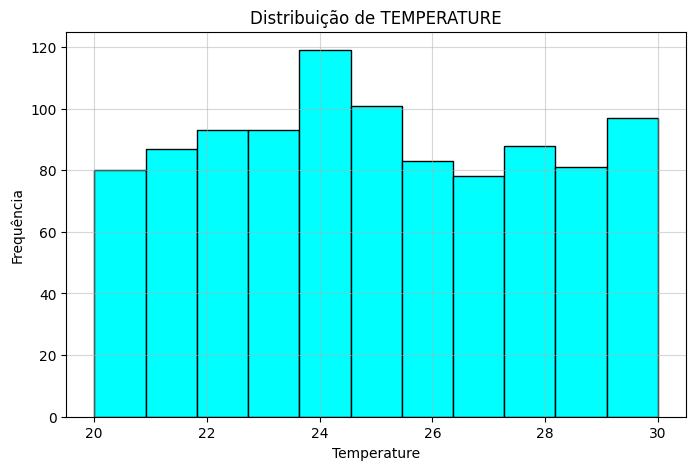

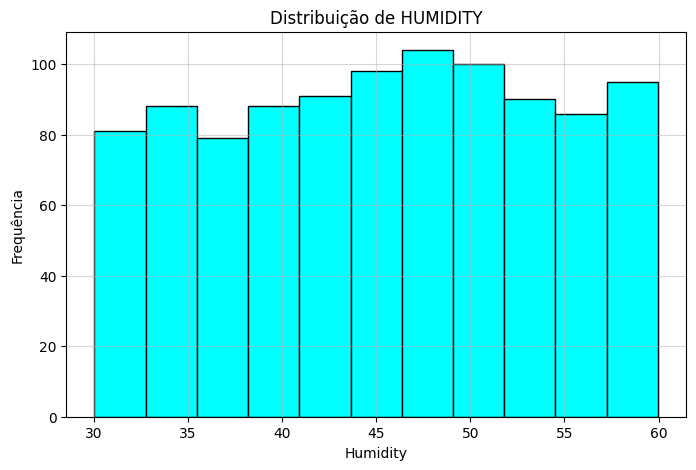

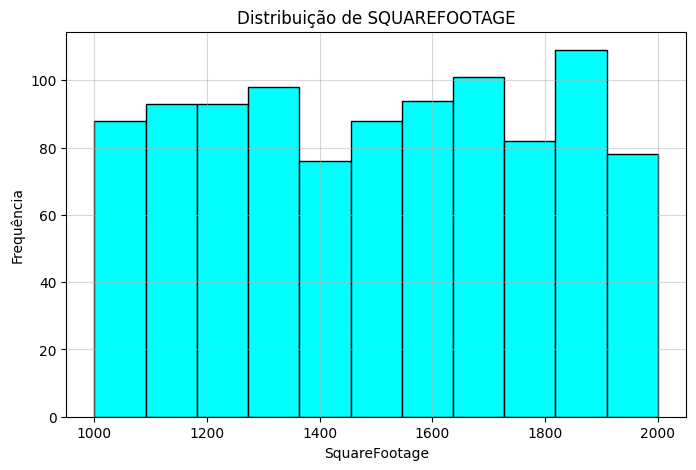

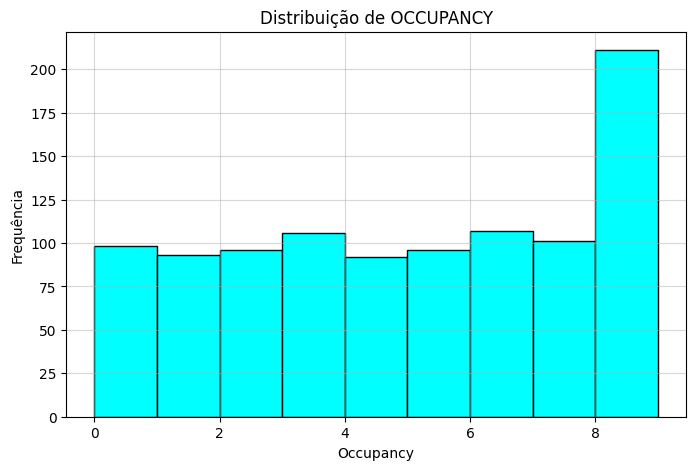

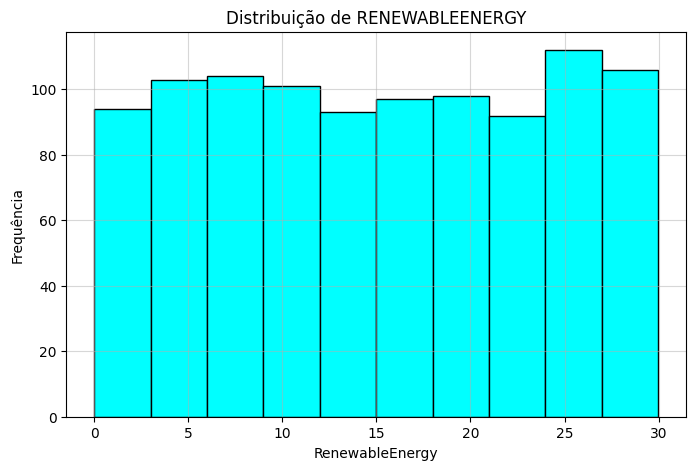

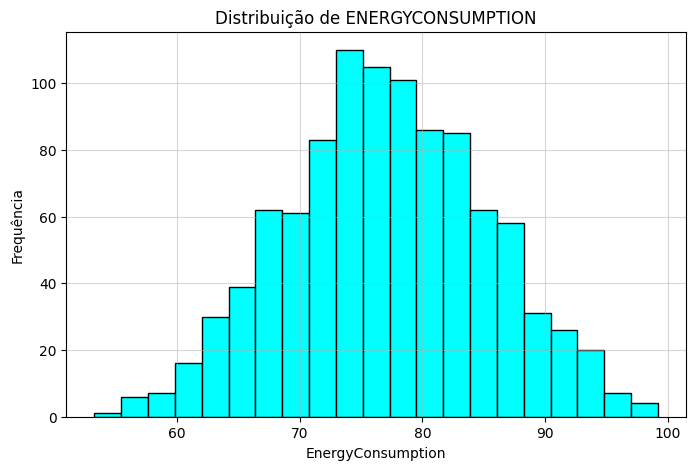

In [79]:
# distribuição do consumo
for atributo_numerico in atributos_numericos:
  dados = df[atributo_numerico]
  plt.figure(figsize= (8, 5))
  plt.hist(dados, bins= 'fd', color= 'cyan', edgecolor= 'black')
  plt.title(f'Distribuição de {atributo_numerico.upper()}')
  plt.xlabel(f'{atributo_numerico}')
  plt.ylabel('Frequência')
  plt.grid(alpha = 0.5)
  plt.show()

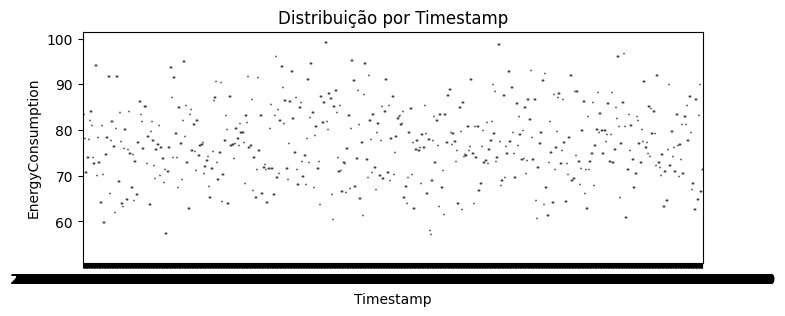

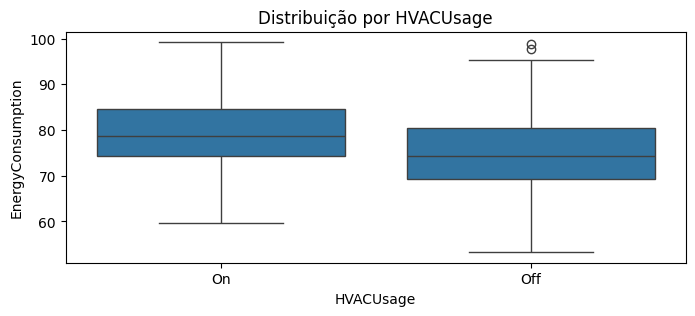

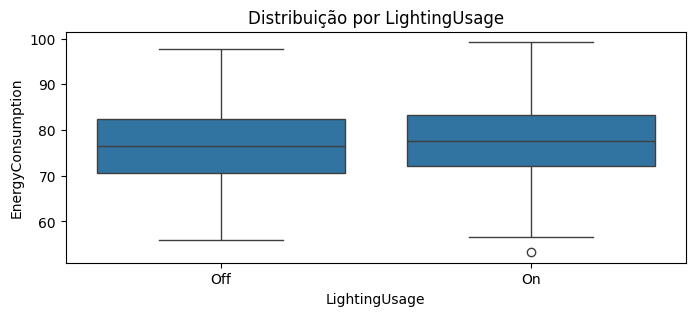

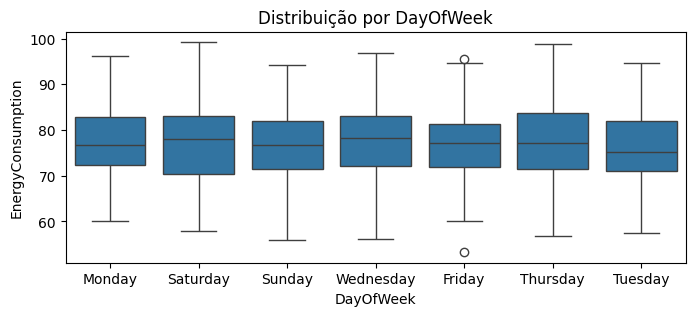

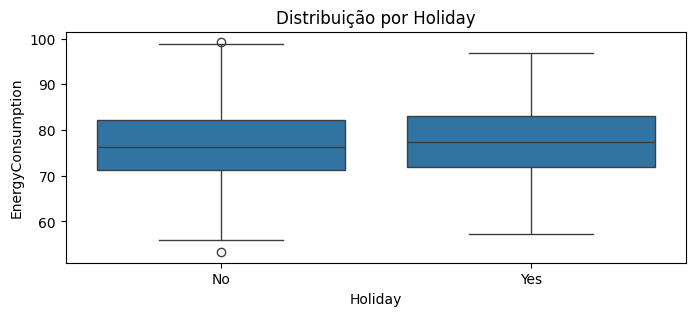

In [81]:
# Gráficos boxplots
for atributo_categorico in atributos_categoricos:
  plt.figure(figsize= (8, 3))

  sns.boxplot(x= atributo_categorico, y = rotulo, data = df[[atributo_categorico, rotulo]])
  plt.title(f'Distribuição por {atributo_categorico}')
  plt.show()

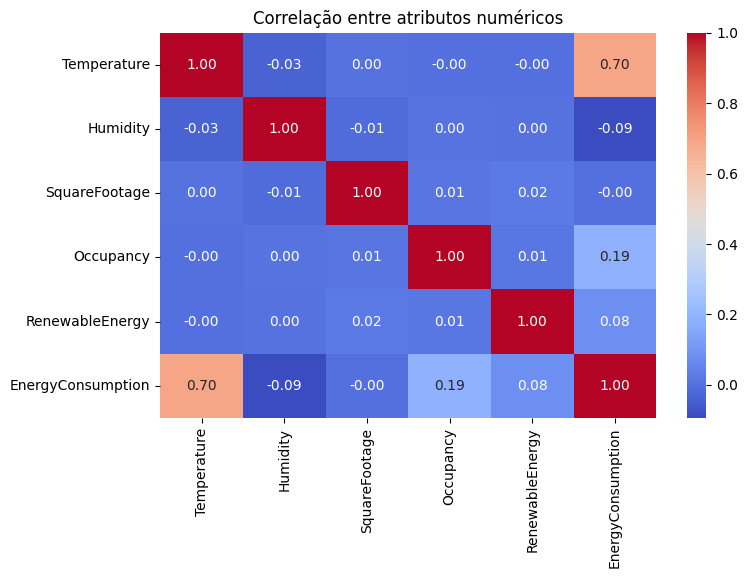

In [82]:
# Mapa de correlação
correlacao_numerica = df[atributos_numericos].corr(method= 'pearson')
plt.figure(figsize= (8, 5))
sns.heatmap(correlacao_numerica, annot = True, cmap= 'coolwarm', fmt = '.2f')
plt.title('Correlação entre atributos numéricos')
plt.show()

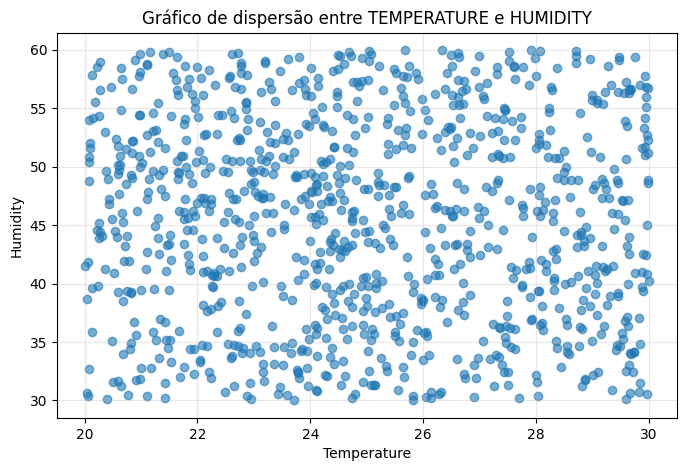

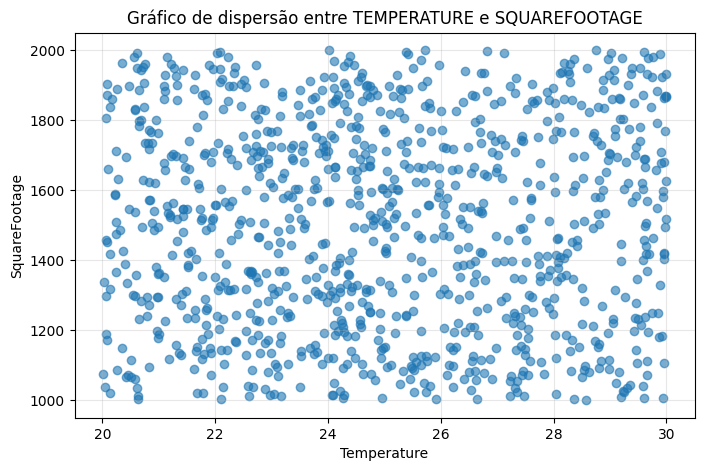

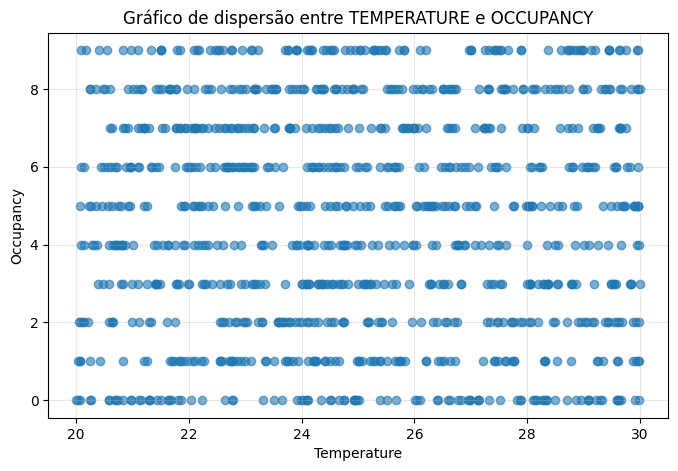

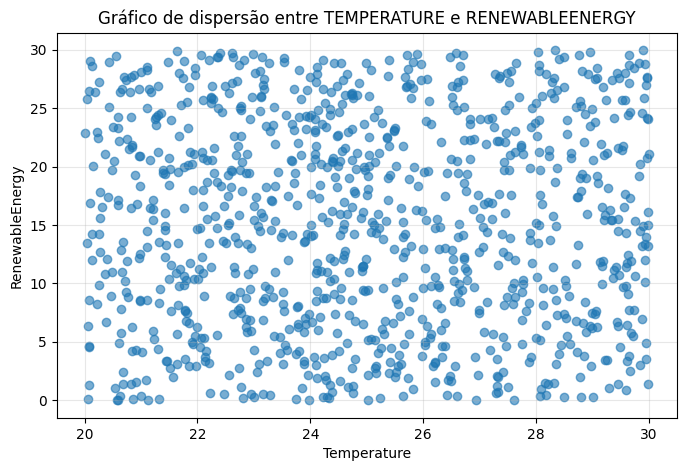

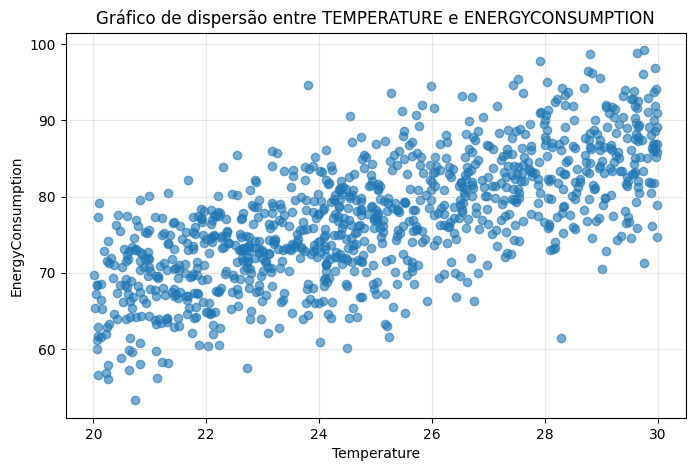

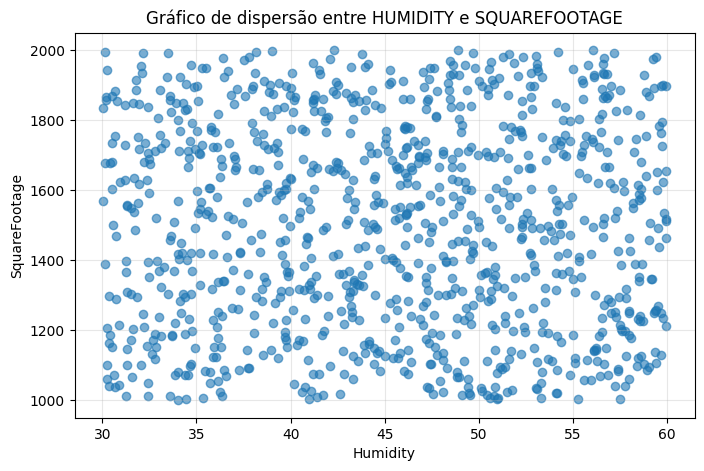

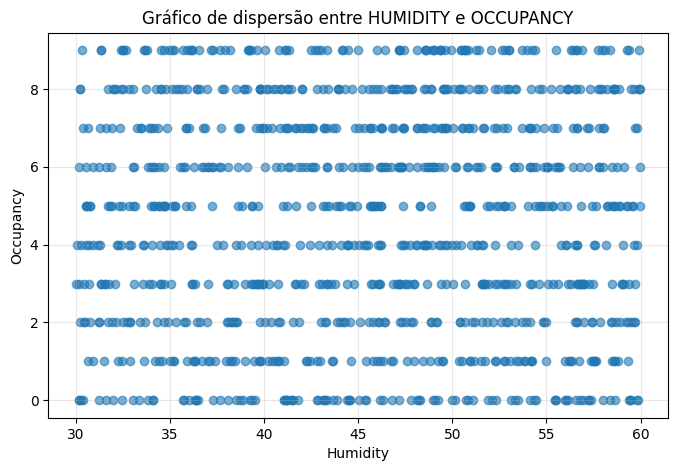

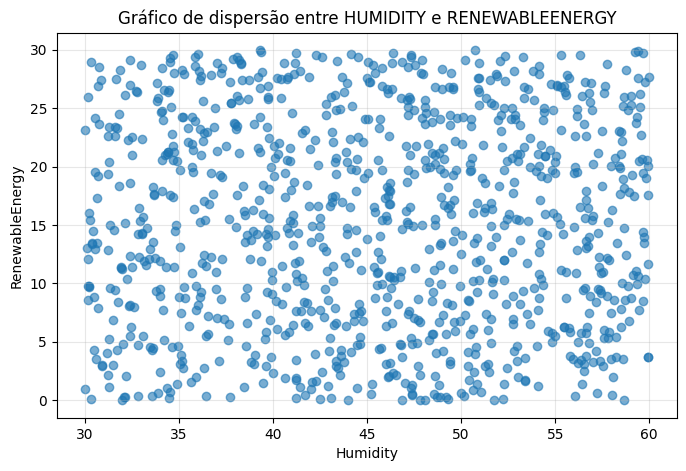

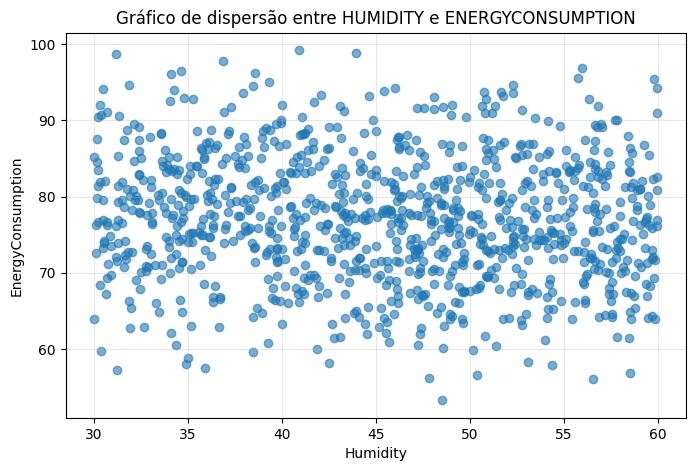

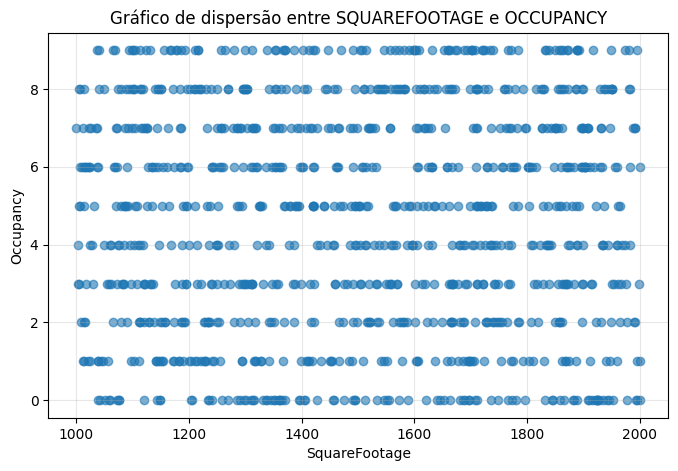

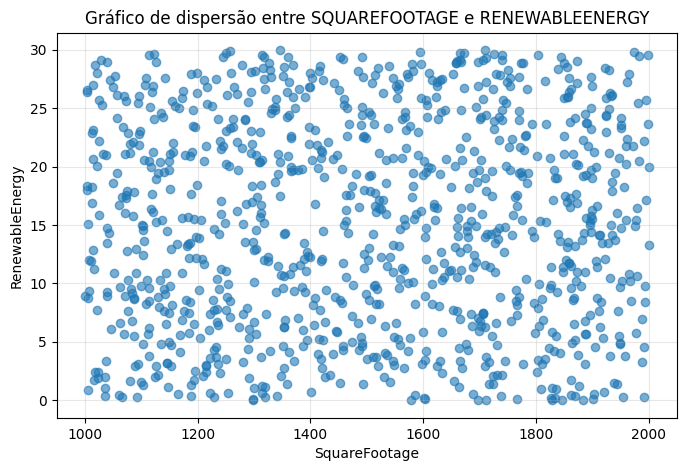

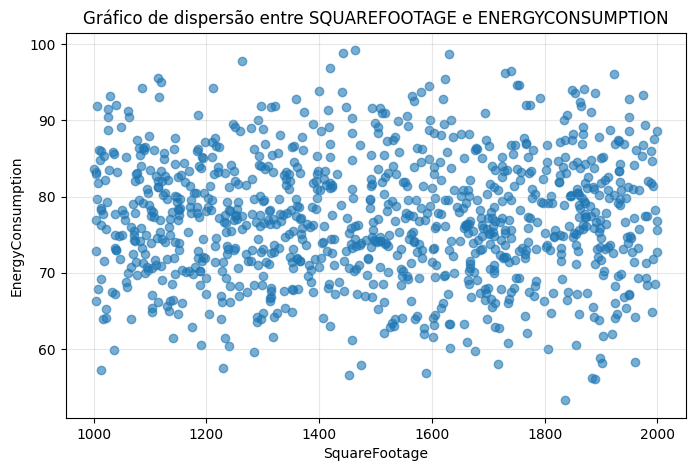

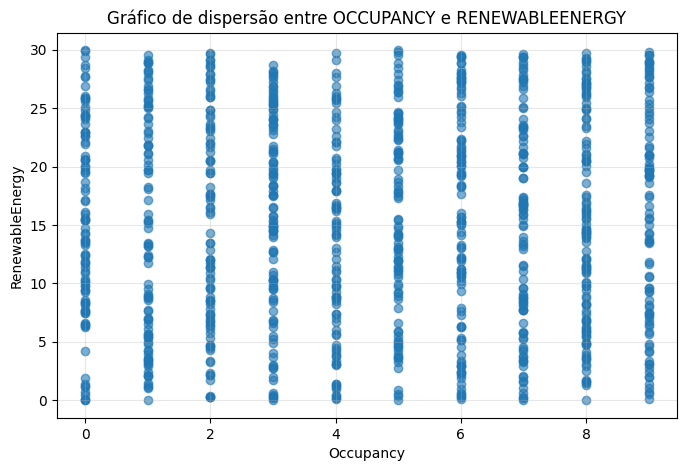

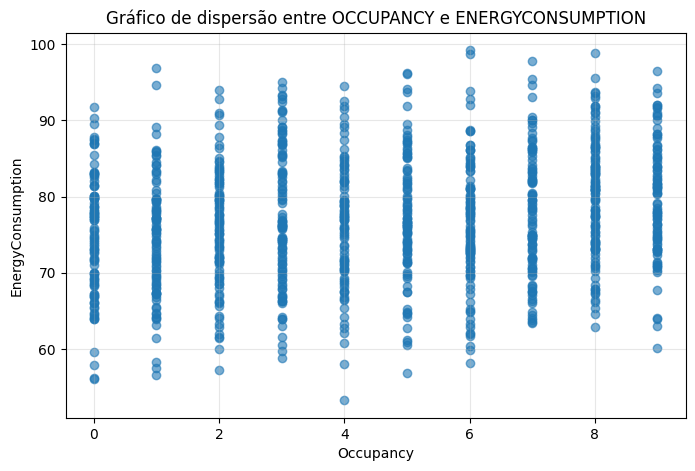

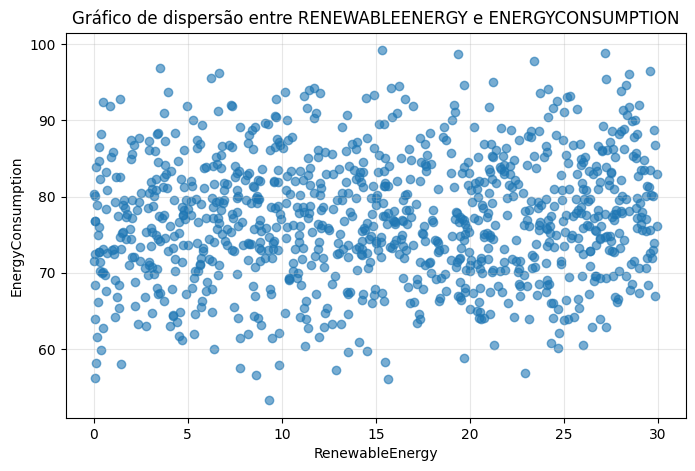

In [83]:
# Gráficos de dispersão
for x, y in combinations(atributos_numericos, 2):
  plt.figure(figsize= (8, 5))
  plt.scatter(df[x], df[y], alpha = 0.6)
  plt.title(f'Gráfico de dispersão entre {x.upper()} e {y.upper()}')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.grid(alpha = 0.3)
  plt.show()

In [85]:
# Identificação de desperdício
# HVAC ligado sem ocupação
desp_hvac = df[(df['Occupancy'] == 0) & (df['HVACUsage'] == "On")]
print('Quantidade de desperdícios HVAC: ', len(desp_hvac))
desp_hvac.head()

Quantidade de desperdícios HVAC:  44


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Date,Month,Day
16,2022-01-01 16:00:00,29.325576,56.954174,1620.861781,0,On,On,15.453999,Friday,No,89.498208,16,2022-01-01,1,Saturday
37,2022-01-02 13:00:00,29.913830,53.340753,1924.186121,0,On,Off,25.848054,Thursday,No,86.889138,13,2022-01-02,1,Sunday
83,2022-01-04 11:00:00,20.746599,39.363068,1907.167579,0,On,On,11.895548,Monday,No,73.154329,11,2022-01-04,1,Tuesday
124,2022-01-06 04:00:00,22.045110,33.324258,1735.080411,0,On,On,14.780812,Tuesday,No,65.981422,4,2022-01-06,1,Thursday
132,2022-01-06 12:00:00,21.301537,52.101509,1924.999794,0,On,Off,24.401683,Thursday,No,64.076968,12,2022-01-06,1,Thursday


In [86]:
# Luz ligada sem ocupação
desp_luz = df[(df['Occupancy'] == 0) & (df['LightingUsage'] == 'On')]
print('Desperdícios de iluminação: ', len(desp_luz))
desp_luz.head()

Desperdícios de iluminação:  50


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Date,Month,Day
16,2022-01-01 16:00:00,29.325576,56.954174,1620.861781,0,On,On,15.453999,Friday,No,89.498208,16,2022-01-01,1,Saturday
77,2022-01-04 05:00:00,24.668142,43.140910,1310.874912,0,Off,On,22.936053,Saturday,Yes,78.046042,5,2022-01-04,1,Tuesday
83,2022-01-04 11:00:00,20.746599,39.363068,1907.167579,0,On,On,11.895548,Monday,No,73.154329,11,2022-01-04,1,Tuesday
105,2022-01-05 09:00:00,21.639981,59.411230,1258.096515,0,Off,On,29.857723,Saturday,No,66.951615,9,2022-01-05,1,Wednesday
124,2022-01-06 04:00:00,22.045110,33.324258,1735.080411,0,On,On,14.780812,Tuesday,No,65.981422,4,2022-01-06,1,Thursday


In [88]:
# Desperdício Total
desp_total = len(desp_hvac) + len(desp_luz)
print(f'Quantidade total de desperdícios: {desp_total}')

Quantidade total de desperdícios: 94


In [90]:
# Energia desperdiçada(kWh)
desp_kwh = desp_hvac['EnergyConsumption'].sum() + desp_luz['EnergyConsumption'].sum()
print(f'Total de energia desperdiçada: {desp_kwh:.2f} kWh')

Total de energia desperdiçada: 7205.82 kWh


In [91]:
# Energia em feriados vs dias normais
feriado = df[df['Holiday'] == 'Yes']['EnergyConsumption'].mean()
normal = df[df['Holiday'] == 'No']['EnergyConsumption'].mean()

print(f'Consumo Médio em feriados: {feriado:.2f} kWh')
print(f'Consumo Médio em dias normais: {normal:.2f} kWh')

Consumo Médio em feriados: 77.55 kWh
Consumo Médio em dias normais: 76.62 kWh


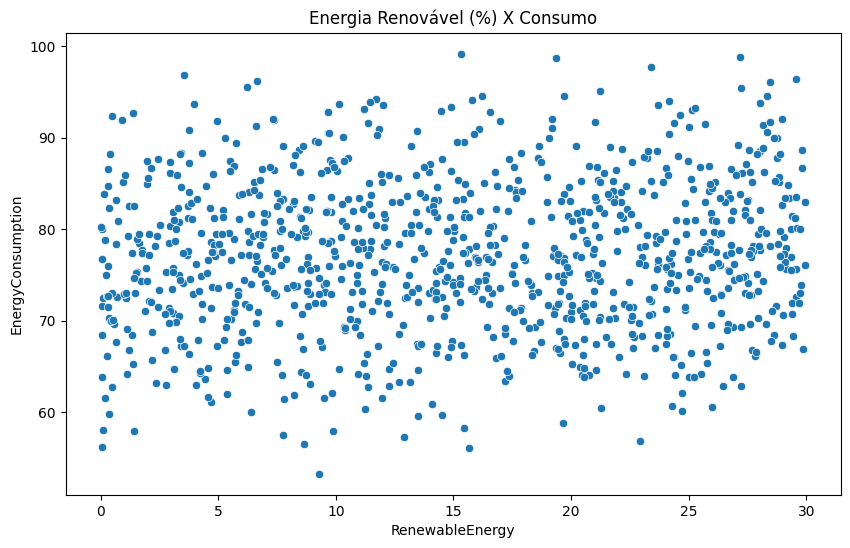

In [92]:
# Impacto da energia renovável
plt.figure(figsize= (10, 6))
sns.scatterplot(data = df, x = 'RenewableEnergy', y = 'EnergyConsumption')
plt.title('Energia Renovável (%) X Consumo')
plt.show()

In [96]:
# Economia financeira R$
# 1 kWh = R$ 0,70

# 1 kWh = 0,06 kg CO₂ emitidos

economia = desp_kwh * 0.70
co2_ev = desp_kwh * 0.06

print(f'Economia financeira: R${economia:.2f}')
print(f'Emissão de CO2 evitada: {co2_ev:.2f}kg')

Economia financeira: R$5044.07
Emissão de CO2 evitada: 432.35kg
